In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_excel(r'C:\Users\aminb\Desktop\Opak\DATA ASPHALTENE.xlsx')
df.head(5)

,temperture,cabon number,DR,Asphaltene wt
0,293,10,2.63773,0.611815
1,293,10,5.04174,2.401060
2,293,10,9.64942,3.583400
3,293,10,14.35730,4.258230
4,293,10,20.63440,4.751910


In [3]:
X = df.to_numpy()


y = X[:, -1]
X = X[:, :-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
mean=X_train.mean(axis=0)
std=np.std(X_train, axis=0,dtype='float64')
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

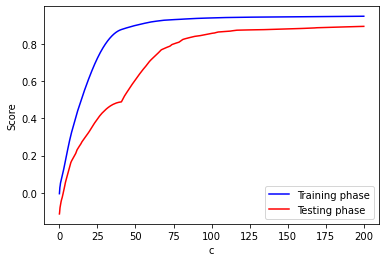

In [6]:
Train_score=[]
Test_score=[]
for i in np.arange(0.1,200,0.1):
    clf=SVR(C=i)
    clf.fit(X_train, y_train)
    Train_score.append(clf.score(X_train,y_train))
    Test_score.append(clf.score(X_test,y_test))

    
plt.plot(np.arange(0.1,200,0.1), np.array(Train_score), 'b-', label='Training phase')
plt.plot(np.arange(0.1,200,0.1), np.array(Test_score), 'r-',label='Testing phase')
plt.xlabel('c')
plt.ylabel('Score')
plt.legend()

In [7]:
model=SVR(C=96,epsilon=0.5)

In [8]:
model.fit(X_train, y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9376182753118129
0.8605723014306237
